TITLE: Omni_Krypto_10

Project Team Members: Chris Diaz, Jaime Leon, Yutika Misra, Griselda Ramos

Motivation & Summary Slide

Define the core message or hypothesis of your project.

Due to the spike of the cryptocurrency market (aka Crypto-boom), many investors have been pivoting away from traditional stock and bond portfolios and allocating their assets into various cryptocurrencies. Cryptocurrency by nature is high risk, high reward, yet the question remains, what coin should I invest in?

Many investors want to invest in crypto however do not have the time or resources to do the proper due diligence
neccessary to create a diversified "crypto" portfolio. Our project is focused on developing three different crypto-currency portfolios ranging from conservative to high risk. Our goal is to present analysis for the investor to choose a uniquely designed portfolio that best fits their risk tolerance and investment needs.

Omni_Krypto_10 is separated into three distinct portfolios: Omni-Krypto Blue (Conservative), Omni-Krypto Yellow (Moderate), and Omni-Krypto Green (Aggressive).
        

We have run analysis on 10 coins that will be utilized in each portfolio. 
    

Describe the questions you asked, and why you asked them.
Describe whether you were able to answer these questions to your satisfaction, and briefly summarize your findings.


Calculations: daily returns, coorelation & heatmap, dominance

In [3]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

In [4]:
# import files
#
#
#
binance_data = Path("crypto_dataset/Binance_Coin.csv")
binance = pd.read_csv(binance_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
binance.drop(columns=['SNo', "Vol." ],inplace=True)
binance.rename(columns = {'Price':'Binance Price'}, inplace = True)
binance.sort_values('Date', ascending=True).dropna()


bitcoin_data = Path("crypto_dataset/Bitcoin.csv")
bitcoin = pd.read_csv(bitcoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
bitcoin.drop(columns=['SNo', "Vol." ],inplace=True)
bitcoin.rename(columns = {'Price':'Bitcoin Price'}, inplace = True)
bitcoin.sort_values('Date', ascending=True).dropna()



cardano_data = Path("crypto_dataset/Cardano.csv")
cardano = pd.read_csv(cardano_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cardano.drop(columns=['SNo', "Vol." ],inplace=True)
cardano.rename(columns = {'Price':'Cardano Price'}, inplace = True)
cardano.sort_values('Date', ascending=True).dropna()


dogecoin_data = Path("crypto_dataset/dogecoin.csv")
dogecoin = pd.read_csv(dogecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
dogecoin.drop(columns=['SNo', "Vol." ],inplace=True)
dogecoin.rename(columns = {'Price':'Dogecoin Price'}, inplace = True)
dogecoin.sort_values('Date', ascending=True).dropna()


ethereum_data = Path("crypto_dataset/ethereum.csv")
ethereum = pd.read_csv(ethereum_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
ethereum.drop(columns=['SNo', "Vol." ],inplace=True)
ethereum.rename(columns = {'Price':'Ethereum Price'}, inplace = True)
ethereum.sort_values('Date', ascending=True).dropna()



iota_data = Path("crypto_dataset/iota.csv")
iota = pd.read_csv(iota_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
iota.drop(columns=['SNo', "Vol." ],inplace=True)
iota.rename(columns = {'Price':'Iota Price'}, inplace = True)
iota.sort_values('Date', ascending=True).dropna()



litecoin_data = Path("crypto_dataset/litecoin.csv")
litecoin = pd.read_csv(litecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
litecoin.drop(columns=['SNo', "Vol." ],inplace=True)
litecoin.rename(columns = {'Price':'Litecoin Price'}, inplace = True)
litecoin.sort_values('Date', ascending=True).dropna()


monero_data = Path("crypto_dataset/monero.csv")
monero = pd.read_csv(monero_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
monero.drop(columns=['SNo', "Vol." ],inplace=True)
monero.rename(columns = {'Price':'Monero Price'}, inplace = True)
monero.sort_values('Date', ascending=True).dropna()


stellar_data = Path("crypto_dataset/stellar.csv")
stellar = pd.read_csv(stellar_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
stellar.drop(columns=['SNo', "Vol." ],inplace=True)
stellar.rename(columns = {'Price':'Stellar Price'}, inplace = True)
stellar = stellar.sort_values('Date', ascending=True).dropna()



xpr_data = Path("crypto_dataset/XPR.csv")
xpr = pd.read_csv(xpr_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
xpr.drop(columns=['SNo', "Vol." ],inplace=True)
xpr.rename(columns = {'Price':'XPR Price'}, inplace = True)
xpr = xpr.sort_values('Date', ascending=True).dropna()



xpr.columns = pd.MultiIndex.from_product([['XPR'], xpr.columns])
stellar.columns = pd.MultiIndex.from_product([['stellar'], stellar.columns])

stellar = stellar.rename(columns={'Stellar Price': 'close'})
xpr = xpr.rename(columns={'XPR Price': 'close'})

xpr

FileNotFoundError: [Errno 2] No such file or directory: 'crypto_dataset\\Binance_Coin.csv'

In [34]:
dm_test = pd.concat([stellar, xpr],
             axis="columns", join="inner")

dm_test

stellar                                          XPR           \
              close     Open     High      Low Change %    close     Open   
Date                                                                        
2018-01-01  0.48480  0.35400  0.52310  0.35210    36.95  2.05000  1.98000   
2018-01-02  0.55700  0.48480  0.58980  0.46200    14.89  2.19000  2.05000   
2018-01-03  0.88600  0.55700  0.91990  0.55240    59.07  2.73000  2.19000   
2018-01-04  0.69480  0.88600  0.91000  0.62500   -21.58  2.73000  2.73000   
2018-01-05  0.63510  0.69480  0.78000  0.53530    -8.59  2.51000  2.73000   
...             ...      ...      ...      ...      ...      ...      ...   
2021-08-20  0.38500  0.36719  0.38766  0.36079     4.86  1.26318  1.23482   
2021-08-21  0.37162  0.38500  0.38500  0.36853    -3.47  1.21663  1.26316   
2021-08-22  0.37268  0.37170  0.38935  0.36137     0.28  1.22574  1.21654   
2021-08-23  0.37901  0.37244  0.38710  0.37014     1.70  1.24617  1.22577   
2021-08-24  0.37227  0.37873  0.38035  0.37016    -1.78  1.24856  1.24630   

                                       
               High      Low Change %  
Date                                   
2018-01-01  2.09000  1.81000     3.54  
2018-01-02  2.21000  1.89000     6.83  
2018-01-03  2.85000  2.15000    24.66  
2018-01-04  3.29000  2.58000     0.00  
2018-01-05  3.05000  2.24000    -8.06  
...             ...      ...      ...  
2021-08-20  1.28762  1.19994     2.29  
2021-08-21  1.28262  1.20444    -3.69  
2021-08-22  1.25540  1.18284     0.75  
2021-08-23  1.30288  1.21150     1.67  
2021-08-24  1.26486  1.21836     0.19  

[1332 rows x 10 columns]

In [3]:
#Concat all data sets into one data frame
#
#
#
#

combined_df = pd.concat([binance, bitcoin,cardano,dogecoin,ethereum,iota,litecoin,monero,stellar,xpr],
             axis="columns", join="inner")
combined_df.head()

prices_df= combined_df[['Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price' ]]
prices_df.head()



,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Date,,,,,,,,,,
2018-01-01,8.45,13444.9,0.4848,2.05,3.90,335.10,0.702200,0.008678,752.46,225.22
2018-01-02,8.72,14754.1,0.5570,2.19,3.98,364.17,0.762000,0.009000,858.78,253.31
2018-01-03,9.30,15156.6,0.8860,2.73,4.13,386.00,1.080000,0.009205,942.01,244.99
2018-01-04,9.14,15180.1,0.6948,2.73,4.10,368.10,1.104300,0.009613,940.00,238.91
2018-01-05,14.88,16954.8,0.6351,2.51,3.76,356.96,0.994903,0.012550,962.77,246.23


In [4]:
#percent change in price
#
#
#

priceschange7_df=prices_df.pct_change(7).dropna()

priceschange7_df.hvplot(ylabel="Percent Change",  ylim=(-2,5),width=1000, height=500)






:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [5]:
#
#
#
#
#
pricechange30_df=prices_df.pct_change(30).dropna()

pricechange30_df.hvplot(ylabel="Percent Change",  ylim=(-2,5),width=1000, height=500)



:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [6]:

#
#
#
#

#find the daily percent change of each coin
pricechange_df=prices_df.pct_change()
#calculate the daily standard deviation of each coin, crypto trades every day
daily_volatility=pricechange_df.std()*np.sqrt(365)
#sorted the daily volatilities in ascending order
daily_volatility=daily_volatility.sort_values(ascending=True)
daily_volatility

Bitcoin Price      0.778142
Ethereum Price     1.013531
Monero Price       1.050838
Litecoin Price     1.077591
Iota Price         1.183531
Cardano Price      1.231092
Binance Price      1.244949
XPR Price          1.250675
Stellar Price      1.267555
Dogecoin Price    32.522483
dtype: float64

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Date,,,,,,,,,,
2018-01-02,1.031953,1.097375,1.148927,1.068293,1.020513,1.086750,1.085161,1.037105,1.141297,1.124722
2018-01-03,1.100592,1.127312,1.827558,1.331707,1.058974,1.151895,1.538023,1.060728,1.251907,1.087781
2018-01-04,1.081657,1.129060,1.433168,1.331707,1.051282,1.098478,1.572629,1.107744,1.249236,1.060785
2018-01-05,1.760947,1.261058,1.310025,1.224390,0.964103,1.065234,1.416837,1.446186,1.279497,1.093287
2018-01-06,2.674556,1.277235,1.419761,1.292683,1.023077,1.175768,1.475071,1.685872,1.334689,1.240654
...,...,...,...,...,...,...,...,...,...,...
2021-08-20,53.830769,3.668603,0.794142,0.616185,0.282595,0.841826,3.496554,36.168933,4.364631,0.815061
2021-08-21,53.093491,3.635267,0.766543,0.593478,0.273782,0.859188,3.469124,34.393985,4.284560,0.797878
2021-08-22,53.098225,3.663434,0.768729,0.597922,0.298215,0.913742,3.854811,35.520627,4.304149,0.825544


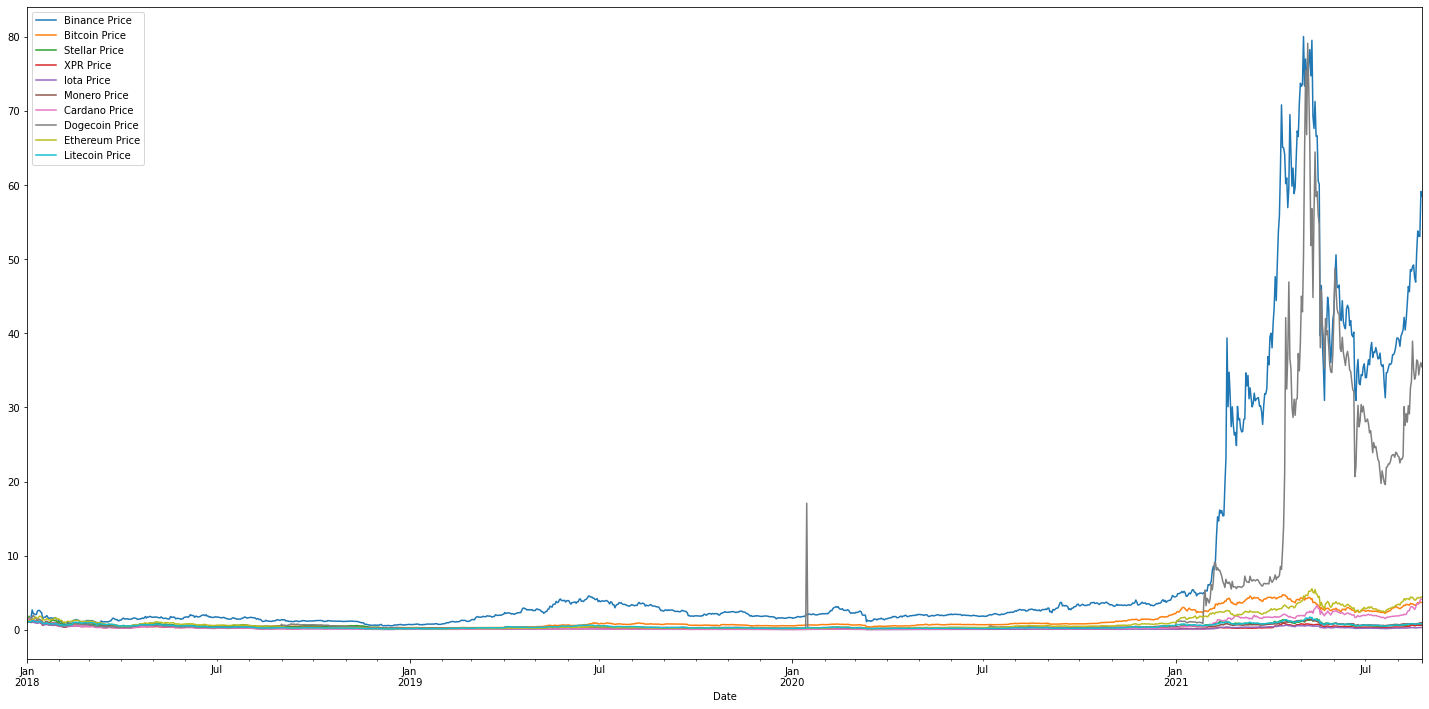

In [7]:
#cumulative returns
cumulative_returns = (1 + pricechange_df).cumprod()

cumulative_returns.plot(figsize=(25,12))
cumulative_returns=cumulative_returns.dropna()
cumulative_returns

<AxesSubplot:xlabel='Date'>

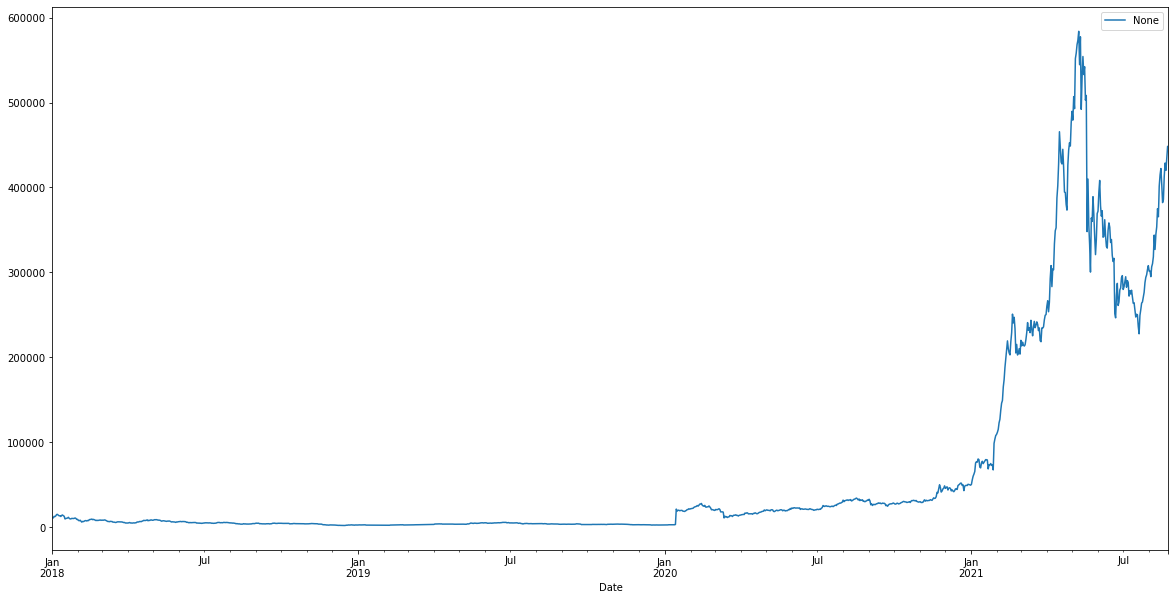

In [8]:
#amount of each stock
# omni crypto test
weights = [0.1, 0.1,.1,.1,.1,.1,.1,.1,.1,.1]
portfolio_returns = pricechange_df.dot(weights)
portfolio_returns.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))


<AxesSubplot:xlabel='Date'>

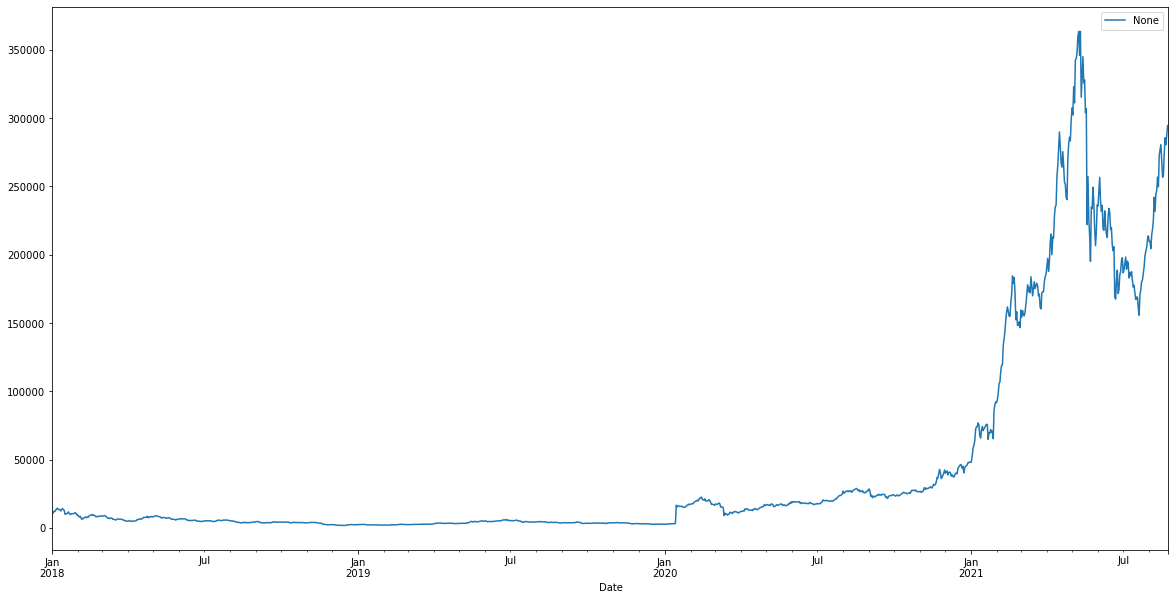

In [9]:
#amount of each stock
# omni crypto conservative blue
#'Binance Price','Bitcoin Price' 25%,'Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price '25%,'Litecoin Price'
weights_conservative = [0.0625, 0.25,.0625,.0625,.0625,.0625,.0625,.0625,.25,.0625]
portfolio_returns = pricechange_df.dot(weights_conservative)
portfolio_returns.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

<AxesSubplot:xlabel='Date'>

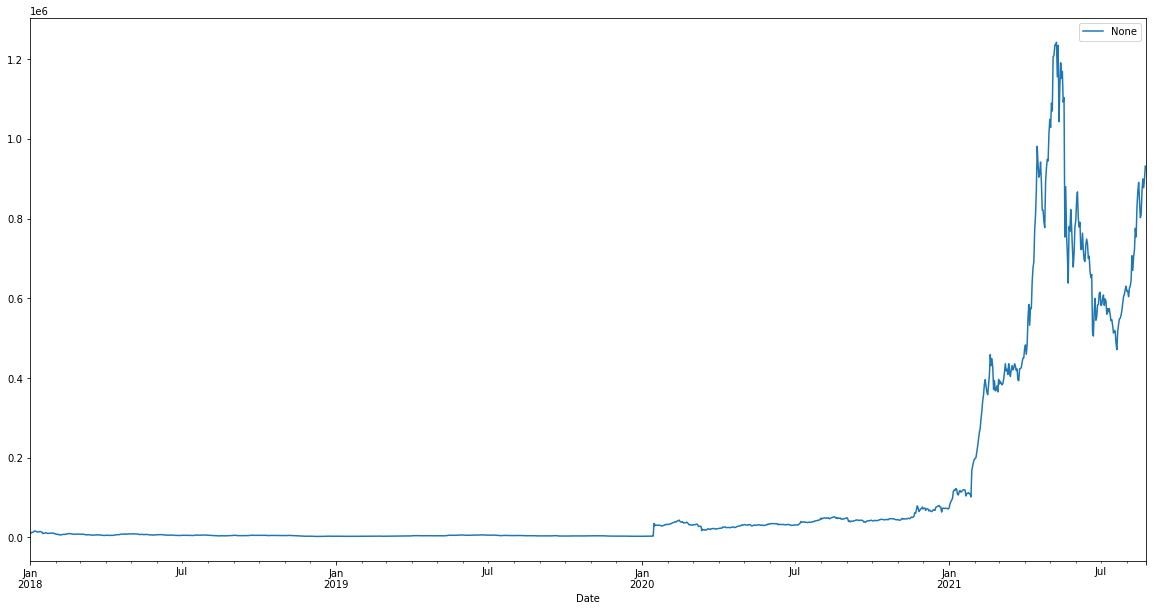

In [10]:
#amount of each stock
# omni crypto Aggressive green
'Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price'
weights = [0.15, 0.067,.15,.15,.066,.066,.067,.15,.067,.067]
portfolio_returns = pricechange_df.dot(weights)
portfolio_returns.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

<AxesSubplot:xlabel='Date'>

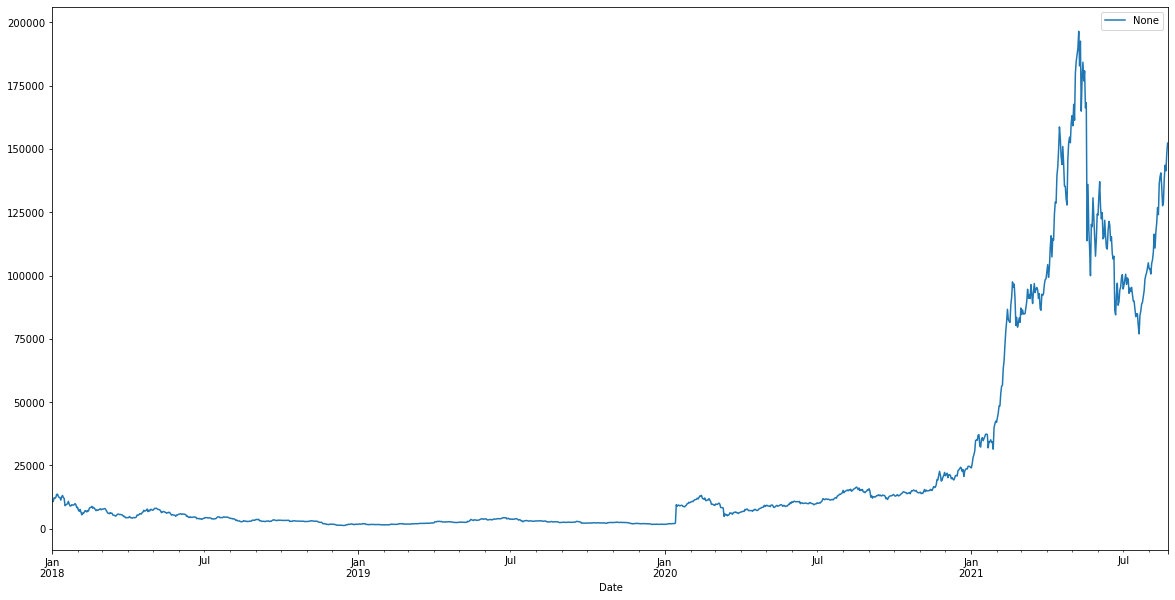

In [11]:
#amount of each stock
# omni crypto Moderate yellow
'Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price'

weights = [0.05, 0.1,.05,.05,.15,.15,.15,.05,.1,.15]
portfolio_returns = pricechange_df.dot(weights)
portfolio_returns.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

In [14]:
pdfp = prices_df.head()

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Date,,,,,,,,,,
2018-01-01,8.45,13444.9,0.4848,2.05,3.90,335.10,0.702200,0.008678,752.46,225.22
2018-01-02,8.72,14754.1,0.5570,2.19,3.98,364.17,0.762000,0.009000,858.78,253.31
2018-01-03,9.30,15156.6,0.8860,2.73,4.13,386.00,1.080000,0.009205,942.01,244.99
2018-01-04,9.14,15180.1,0.6948,2.73,4.10,368.10,1.104300,0.009613,940.00,238.91
2018-01-05,14.88,16954.8,0.6351,2.51,3.76,356.96,0.994903,0.012550,962.77,246.23


In [35]:
XDA = MCSimulation(
    portfolio_data = dm_test,
    weights = [0.5,0.5],
    num_simulation = 500,
    num_trading_days = 365*10
)

XDA.portfolio_data.head()

stellar                                                 XPR        \
             close    Open    High     Low Change % daily_return close  Open   
Date                                                                           
2018-01-01  0.4848  0.3540  0.5231  0.3521    36.95          NaN  2.05  1.98   
2018-01-02  0.5570  0.4848  0.5898  0.4620    14.89     0.148927  2.19  2.05   
2018-01-03  0.8860  0.5570  0.9199  0.5524    59.07     0.590664  2.73  2.19   
2018-01-04  0.6948  0.8860  0.9100  0.6250   -21.58    -0.215801  2.73  2.73   
2018-01-05  0.6351  0.6948  0.7800  0.5353    -8.59    -0.085924  2.51  2.73   

                                              
            High   Low Change % daily_return  
Date                                          
2018-01-01  2.09  1.81     3.54          NaN  
2018-01-02  2.21  1.89     6.83     0.068293  
2018-01-03  2.85  2.15    24.66     0.246575  
2018-01-04  3.29  2.58     0.00     0.000000  
2018-01-05  3.05  2.24    -8.06    -0.080586

In [36]:
XDA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/davemelillo/Desktop/Fintech-project-1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020425,1.014846,0.987763,0.946866,0.940481,0.926829,0.956620,1.048049,1.009691,1.010593,...,1.063470,1.077931,0.957588,0.923467,1.001588,1.039296,0.987187,0.963742,0.959081,0.970144
2,1.031548,1.031688,0.984746,0.909363,0.920744,0.911876,0.922488,1.062747,1.104071,1.019279,...,0.937719,1.098084,1.070480,0.932727,1.007179,1.019765,0.956624,0.928685,1.021906,1.014771
3,1.019915,1.019557,0.996215,0.848793,0.896748,0.932051,0.854721,1.022822,1.113072,0.972181,...,0.952526,1.142860,0.985170,0.935093,0.976205,1.017875,0.987977,0.985296,1.013023,1.075089
4,0.994548,0.996393,1.008378,0.908428,0.807802,0.923492,0.840624,1.076062,1.143771,0.996353,...,0.920591,1.181781,0.966042,0.907325,1.027874,1.039176,1.012296,0.953116,1.005897,1.031727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,6.228055,6.061933,21.514737,5.585118,1156.503392,179.400875,38197.035021,0.284237,85.214454,904.569495,...,277.871446,4.682421,1286.685052,11.953666,1.150006,15.925142,0.325858,0.230506,144.217550,0.127170
3647,6.070655,5.984569,20.506754,5.772968,1200.669899,173.810628,37488.146802,0.271746,84.380129,897.017869,...,255.332376,4.577395,1150.630336,11.641411,1.134505,16.391542,0.329798,0.222280,156.102650,0.128327
3648,6.247210,5.916415,23.301359,5.451399,1118.279688,170.295251,39563.197412,0.278182,85.291980,958.416822,...,244.310996,4.420315,1187.519746,13.035411,1.179131,16.498604,0.335990,0.250532,160.186410,0.135143
3649,6.386744,5.840497,24.224552,5.566294,1029.678498,176.588561,41587.468164,0.294374,83.862756,958.073754,...,249.462777,4.481024,1141.679213,12.672425,1.228131,16.223392,0.351007,0.244109,147.904144,0.131390


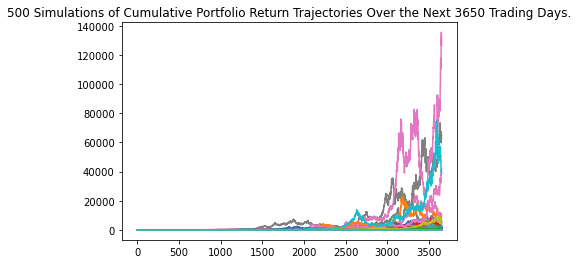

In [37]:
line_plot = XDA.plot_simulation()

In [38]:
even_tbl = XDA.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count              500.000000
mean               850.852729
std               7071.509187
min                  0.002441
25%                  2.551591
50%                 16.478044
75%                127.839915
max             131360.879888
95% CI Lower         0.062852
95% CI Upper      3746.813055
Name: 3650, dtype: float64


In [39]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $942.78 and $56202195.82.


In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
df.calc_cumulative_return()

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Binance Price,1.000000,0.617582,0.496024,0.488447,0.572903,0.587852,0.537172,0.038424,0.612633,0.597919
Bitcoin Price,0.617582,1.000000,0.615823,0.591237,0.710640,0.755615,0.678079,0.022190,0.807039,0.784878
Stellar Price,0.496024,0.615823,1.000000,0.716766,0.678809,0.614206,0.760861,0.038162,0.673453,0.634278
XPR Price,0.488447,0.591237,0.716766,1.000000,0.685428,0.588318,0.637123,0.015325,0.654501,0.645542
Iota Price,0.572903,0.710640,0.678809,0.685428,1.000000,0.708330,0.735537,0.067560,0.758756,0.724791
Monero Price,0.587852,0.755615,0.614206,0.588318,0.708330,1.000000,0.670958,0.066343,0.742073,0.721328
Cardano Price,0.537172,0.678079,0.760861,0.637123,0.735537,0.670958,1.000000,0.031575,0.754739,0.698627
Dogecoin Price,0.038424,0.022190,0.038162,0.015325,0.067560,0.066343,0.031575,1.000000,0.021561,0.019952
Ethereum Price,0.612633,0.807039,0.673453,0.654501,0.758756,0.742073,0.754739,0.021561,1.000000,0.810607
Litecoin Price,0.597919,0.784878,0.634278,0.645542,0.724791,0.721328,0.698627,0.019952,0.810607,1.000000


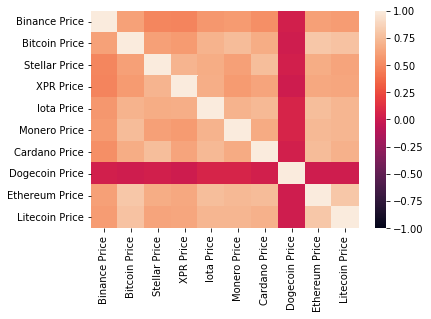

In [42]:
correlation = pricechange_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

In [ ]:
#Questions & Data

##Elaborate on the questions you asked, describing what kinds of data you needed to answer them and where you found it.

In [ ]:
#Data Cleanup & Exploration

##Describe the exploration and cleanup process.
##Discuss insights you had while exploring the data that you didn't anticipate.
##Discuss any problems that arose after exploring the data, and how you resolved them.
##Present and discuss interesting figures developed during exploration, ideally with the help of Jupyter Notebook.

In [ ]:
#Data Analysis

##Discuss the steps you took to analyze the data and answer each question you asked in your proposal.
##Present and discuss interesting figures developed during analysis, ideally with the help of Jupyter Notebook.

In [ ]:
#Postmortem

##Discuss any difficulties that arose, and how you dealt with them.
##Discuss any additional questions that came up, but which you didn't have time to answer: 
##What would you research next, if you had two more weeks?

In [ ]:
#Questions

##Open-floor Q&A with the audience